If you've ever messed around with software defined radio hardware, you may have come accross I/Q signals. They are a fundamental concept in signal processing, but as a beginner I never fully understood what they are and why they exist.

## It's all about representation

First, let's remind ourselves what an SDR recciver actually does. At a fundamental level, they convert radio waves reccived by the antenna into digital samples able to be interpreted by a computer program. In other words, they are a kind of [Analog to Digital Converter](https://en.wikipedia.org/wiki/Analog-to-digital_converter).

::: {.callout-tip title=true collapse=false}
## What are samples?
A sample is a discrete measurement of the signal taken at a point in time. Think of them as like pixels in an image. The SDR receiver takes many measurements of the reccieved signal at regular intervals. The rate in which these measurements are taken is called the [Sample Rate](https://en.wikipedia.org/wiki/Sampling_(signal_processing))


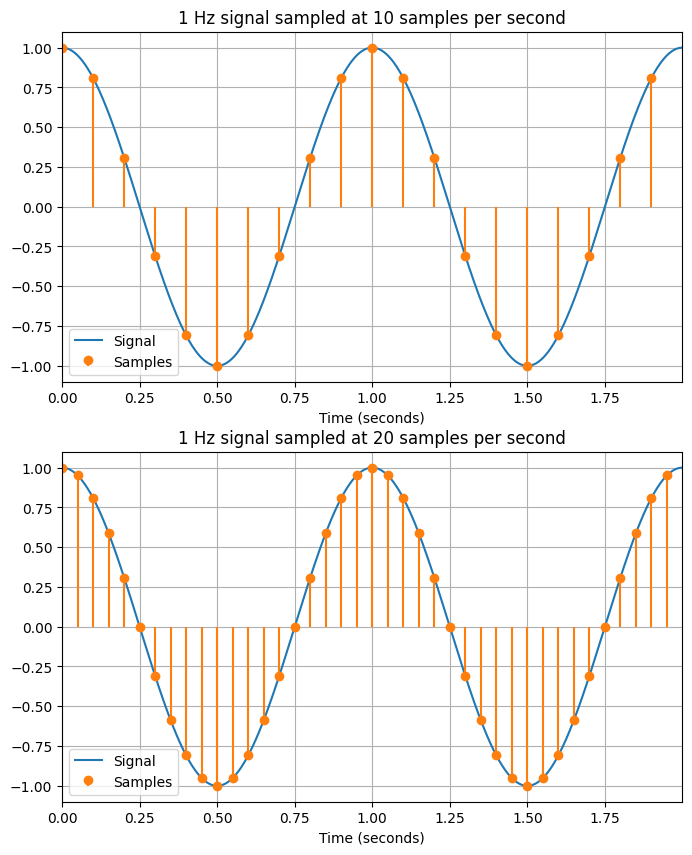

In [9]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]

sps_0 = 10
sps_1 = 20

x_d_0 = np.arange(0, 2, 1/sps_0)
x_d_1 = np.arange(0, 2, 1/sps_1)
x = np.arange(0, 2, 0.001)

fig, (ax, ax1) = plt.subplots(2)
fig.set_figheight(10)
ax.set_title(f"1 Hz signal sampled at {sps_0} samples per second")
ax.set_xlabel("Time (seconds)")
ax.plot(x, np.cos(2*np.pi*x), label="Signal")
#ax.scatter(x_d, np.cos(2*np.pi*x_d), label="Samples", color="C1", zorder=2)
ax.stem(x_d_0, np.cos(2*np.pi*x_d_0), label="Samples", basefmt=" ", linefmt="C1", markerfmt="C1o")
ax.set_xlim(left=x[0], right=x[-1])
ax.legend()
ax.grid()

ax1.set_title(f"1 Hz signal sampled at {sps_1} samples per second")
ax1.set_xlabel("Time (seconds)")
ax1.plot(x, np.cos(2*np.pi*x), label="Signal")
#ax.scatter(x_d, np.cos(2*np.pi*x_d), label="Samples", color="C1", zorder=2)
ax1.stem(x_d_1, np.cos(2*np.pi*x_d_1), label="Samples", basefmt=" ", linefmt="C1", markerfmt="C1o")
ax1.set_xlim(left=x[0], right=x[-1])
ax1.legend()
ax1.grid()

plt.show(fig)

:::

When we sample at a given rate, there is a limit to the highest frequency we can reproduce without loosing information. This is called the [Nyqist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency). The Nyquist frequency is half of the sample rate. E.g. if we sample at 48000Hz then the highest frequency we can reproduce is 24000Hz. 

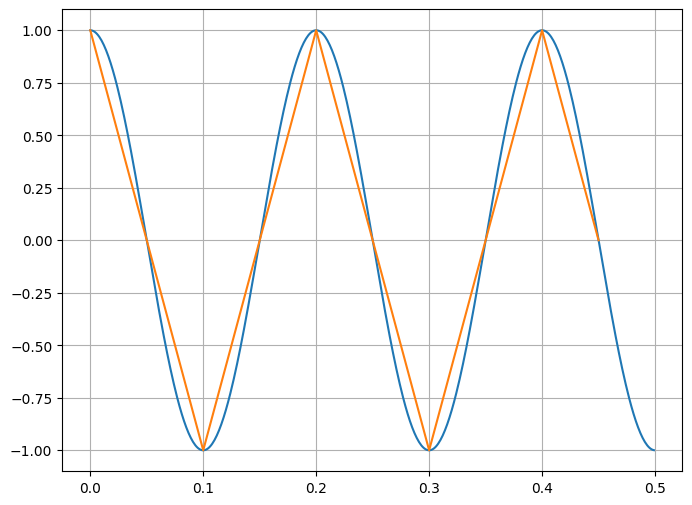

In [26]:
sps = 20
f = 5
end = 0.5

x = np.arange(0,end,0.001)
x_d = np.arange(0,end, 1/sps)

fig, ax = plt.subplots()
ax.grid()
ax.plot(x, np.cos(2*np.pi*f*x))
ax.plot(x_d, np.cos(2*np.pi*f*x_d))
